<a href="https://colab.research.google.com/github/nanaaries313/Portfolio/blob/main/ECommerce_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [186]:
csv_url = 'https://raw.githubusercontent.com/nanaaries313/Portfolio/refs/heads/main/ecommerce_transactions.csv'
sales = pd.read_csv(csv_url)

In [187]:
sales.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [188]:
sales.shape

(50000, 8)

In [189]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [190]:
sales.describe()

,Transaction_ID,Age,Purchase_Amount
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.968680,503.159793
std,14433.901067,15.260578,286.563558
min,1.000000,18.000000,5.040000
25%,12500.750000,31.000000,255.450000
50%,25000.500000,44.000000,503.110000
75%,37500.250000,57.000000,751.162500
max,50000.000000,70.000000,999.980000


# What is the mean of customers' Age?

In [191]:
sales['Age'].mean()

43.96868

In [192]:
sales['Age'].median()

44.0

Density (KDE) and a box plot with the Customer_Age data:

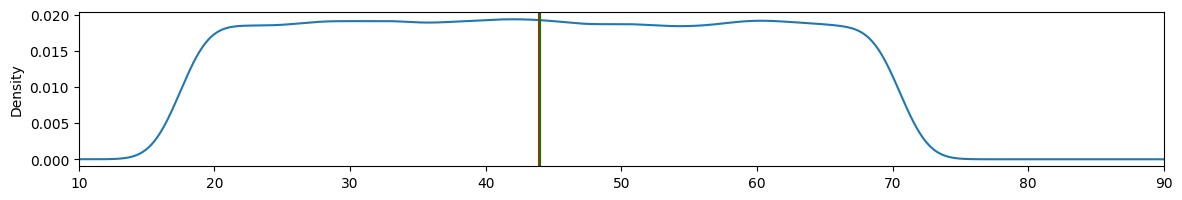

In [193]:
ax = sales['Age'].plot(kind='kde', figsize= (14, 2))
ax.axvline(sales['Age'].mean(), color='red')
ax.axvline(sales['Age'].median(), color='green')
ax.set_xlim(10, 90)
plt.show()

<Axes: >

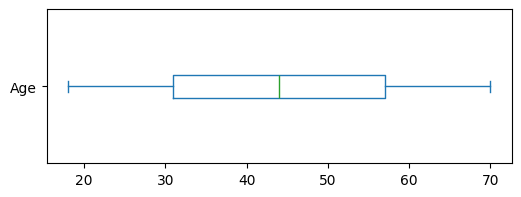

In [194]:
sales['Age'].plot(kind='box', vert=False, figsize=(6,2))


# What is the mean of Purchase_Amount?



In [195]:
sales['Purchase_Amount'].mean()

503.15979300000004

Histogram and a box plot with the Order_Quantity data:

<Axes: ylabel='Frequency'>

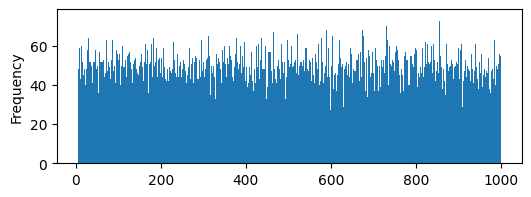

In [196]:
sales ['Purchase_Amount'].plot(kind='hist', bins=1000, figsize=(6,2))

<Axes: >

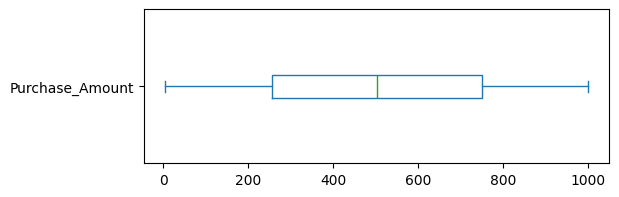

In [197]:
sales ['Purchase_Amount'].plot(kind='box', vert=False, figsize=(6,2))

# How many sales per year?



In [198]:
sales ['Transaction_Date'] = pd.to_datetime(sales ['Transaction_Date'])
sales ['Year'] = sales ['Transaction_Date'].dt.year
sales ['Year']. value_counts()

,count
Year,
2024,25039
2023,20416
2025,4545


A pie plot with sales per year:

<Axes: ylabel='count'>

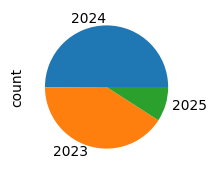

In [199]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,2))


# How many sales per month?

In [200]:
sales ['Transaction_Date'] = pd.to_datetime(sales ['Transaction_Date'])
sales ['Month'] = sales ['Transaction_Date'].dt.month
sales ['Month']. value_counts()

,count
Month,
1,4271
10,4247
7,4246
12,4246
5,4234
8,4213
9,4169
11,4149
3,4139


A bar plot with monthly sales:

<ipython-input-201-8a603d710b20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=sales, palette='plasma')


<Axes: xlabel='Month', ylabel='count'>

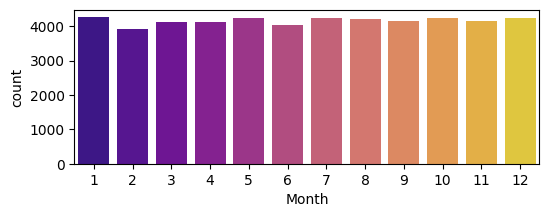

In [201]:
plt.figure(figsize=(6,2))
sns.countplot(x='Month', data=sales, palette='plasma')

# Which country has the most sales?

In [202]:
sales['Country'].value_counts().head(1)


,count
Country,
Canada,5082


In [203]:
sales['Country'].value_counts()


,count
Country,
Canada,5082
Mexico,5059
Germany,5047
India,4996
France,4993
Australia,4985
USA,4979
Japan,4960
UK,4951


Bar plot of the sales per country

<ipython-input-204-dc2dd9957313>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=sales, palette='Set3')


<Axes: xlabel='count', ylabel='Country'>

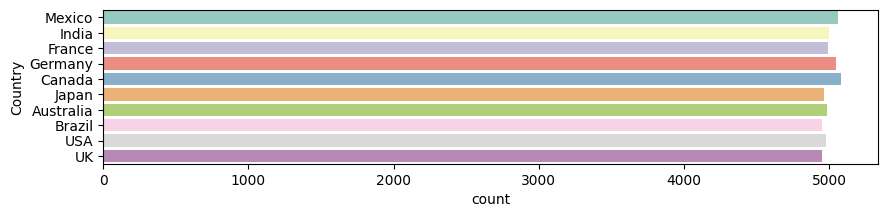

In [204]:
plt.figure(figsize=(10,2))
sns.countplot(y='Country', data=sales, palette='Set3')

# Create a list of product category

In [205]:
sales['Product_Category'].unique()


array(['Clothing', 'Beauty', 'Books', 'Sports', 'Toys', 'Home & Kitchen',
       'Grocery', 'Electronics'], dtype=object)

<Axes: xlabel='Product_Category'>

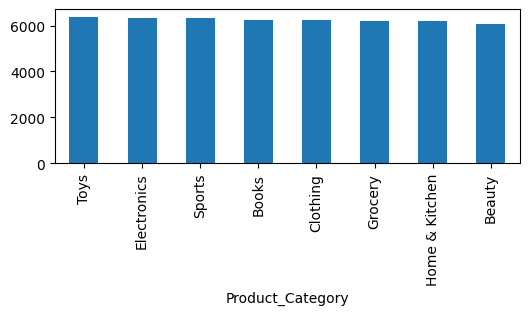

In [206]:
sales['Product_Category'].value_counts().plot(kind='bar', figsize=(6,2))


# The relationship between Purchase_Amount and Age:


<ipython-input-207-11e2832630a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Purchase_Amount', data=sales, palette='viridis')


<Axes: xlabel='Age', ylabel='Purchase_Amount'>

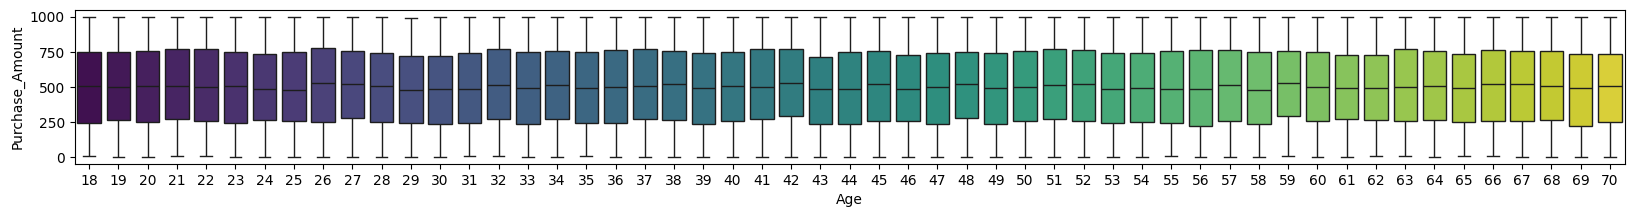

In [207]:
plt.figure(figsize=(20,2))
sns.boxplot(x='Age', y='Purchase_Amount', data=sales, palette='viridis')

# The relationship between Purchase_Amount and Country

<ipython-input-208-3018588a358a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Purchase_Amount', data=sales, palette='cubehelix')


<Axes: xlabel='Country', ylabel='Purchase_Amount'>

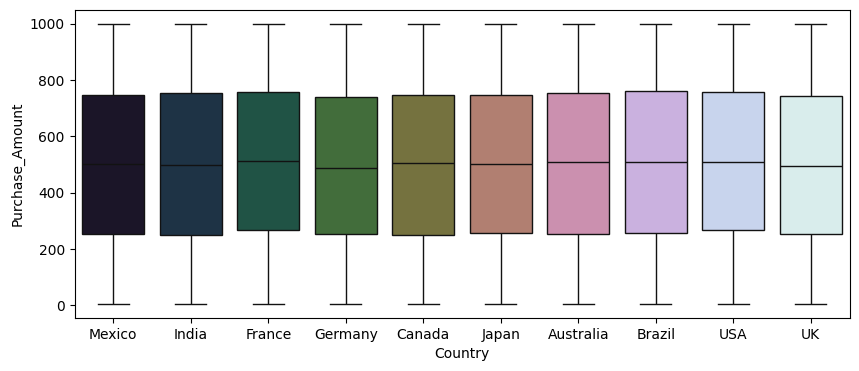

In [208]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Country', y='Purchase_Amount', data=sales, palette='cubehelix')

# Add Month and Year column

In [209]:
sales['Month'] = pd.to_datetime(sales['Transaction_Date']).dt.month
sales['Year'] = pd.to_datetime(sales['Transaction_Date']).dt.year
sales. head()


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,2023,4
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,2023,7
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,2023,9
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,2023,6
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,2024,10


# How did sales evolve through the years?

In [210]:
sales ['Purchase_Amount']. mean()

503.15979300000004

In [211]:
sales ['Purchase_Amount'].median()

503.11

<Axes: xlabel='Transaction_Date', ylabel='Purchase_Amount'>

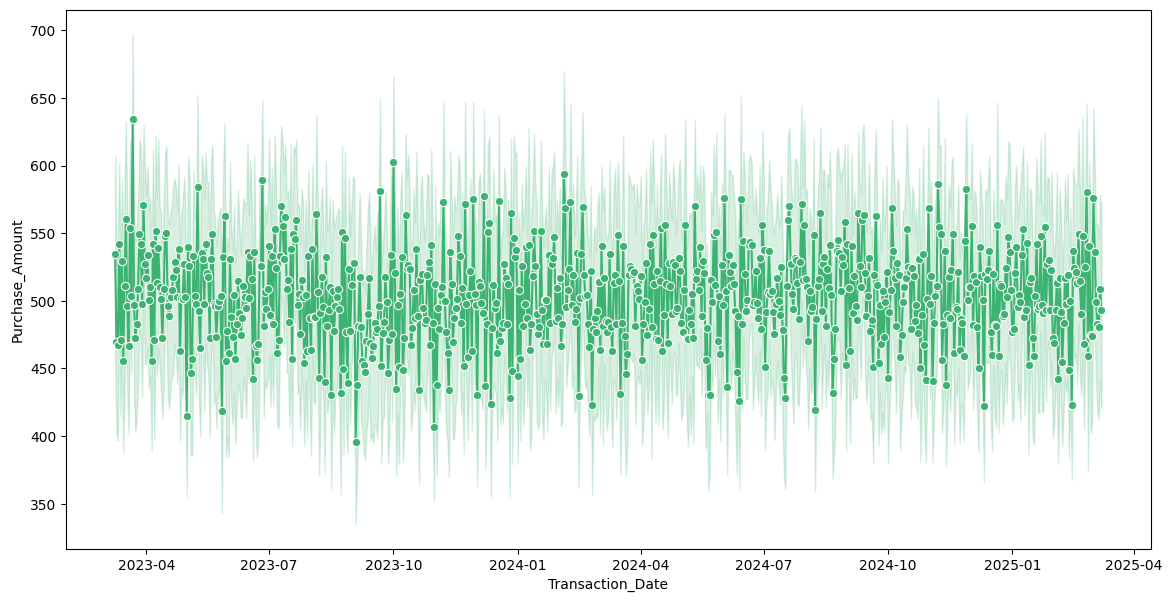

In [212]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = 'Transaction_Date', y = 'Purchase_Amount', data = sales, marker='o', color='mediumseagreen')

# The top-5 transactions with the highest Purchase_Amount




In [213]:
sales.sort_values(['Purchase_Amount'], ascending=False).head(5)



,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month
41014,41015,Sophia Anderson,48,France,Home & Kitchen,999.98,Credit Card,2024-01-08,2024,1
47132,47133,Liam White,54,UK,Toys,999.98,PayPal,2024-12-07,2024,12
36984,36985,Liam Anderson,63,Australia,Clothing,999.95,Credit Card,2024-04-02,2024,4
19235,19236,Emma Hall,37,France,Grocery,999.94,Net Banking,2023-07-20,2023,7
20013,20014,Noah White,56,Japan,Clothing,999.93,PayPal,2024-11-06,2024,11


# What is the numbers of customers with more than $500 in Purchase_Amount?

In [214]:
sales [sales['Purchase_Amount'] > 500.00] ['User_Name'].count()

25165

# What is the numbers of customers with less than $500 in Purchase_Amount?

In [215]:
sales [sales ['Purchase_Amount'] < 500.00] ['User_Name'].count()

24835

# How many orders were made in May of 2024?


In [216]:
cond = (sales['Year'] == 2024) & (sales['Month'] == 5)

sales.loc[cond].shape[0]

2142

<Axes: title={'center': 'Purchase_Amount'}, xlabel='[Month]'>

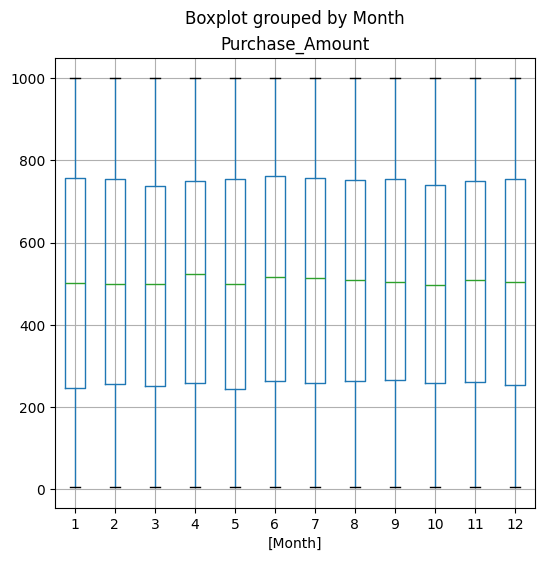

In [217]:
Purchase_Amount_2024 = sales.loc[sales['Year'] == 2024, ['Purchase_Amount', 'Month']]

Purchase_Amount_2024.boxplot(by='Month', figsize=(6,6))

# Add 7.2% TAX on every sale in United States


In [218]:
sales [sales['Country'] == 'USA']. head ()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month
21,22,Emma Clark,58,USA,Toys,404.60,PayPal,2023-05-30,2023,5
32,33,Olivia Hall,51,USA,Electronics,790.20,UPI,2023-11-19,2023,11
34,35,Noah Thompson,63,USA,Grocery,216.99,Net Banking,2023-10-12,2023,10
42,43,Elijah Clark,58,USA,Beauty,85.48,UPI,2023-12-18,2023,12
48,49,Elijah Anderson,20,USA,Sports,189.64,Credit Card,2023-08-03,2023,8


In [219]:
sales.loc[sales['Country'] == 'USA', 'Purchase_Amount'] *= 1.072
sales [sales['Country'] == 'USA']. head ()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month
21,22,Emma Clark,58,USA,Toys,433.73120,PayPal,2023-05-30,2023,5
32,33,Olivia Hall,51,USA,Electronics,847.09440,UPI,2023-11-19,2023,11
34,35,Noah Thompson,63,USA,Grocery,232.61328,Net Banking,2023-10-12,2023,10
42,43,Elijah Clark,58,USA,Beauty,91.63456,UPI,2023-12-18,2023,12
48,49,Elijah Anderson,20,USA,Sports,203.29408,Credit Card,2023-08-03,2023,8


# The transaction records of the customer with the User_Name: Emma Clark


In [220]:
sales.loc[sales['User_Name'] == 'Emma Clark']

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month
21,22,Emma Clark,58,USA,Toys,433.73120,PayPal,2023-05-30,2023,5
131,132,Emma Clark,27,India,Grocery,360.36000,Debit Card,2024-10-01,2024,10
135,136,Emma Clark,55,Australia,Clothing,677.68000,PayPal,2023-09-18,2023,9
367,368,Emma Clark,27,Germany,Grocery,550.15000,Credit Card,2024-11-04,2024,11
408,409,Emma Clark,30,USA,Home & Kitchen,643.81104,PayPal,2024-12-15,2024,12
...,...,...,...,...,...,...,...,...,...,...
49108,49109,Emma Clark,26,Australia,Electronics,215.55000,Net Banking,2024-07-26,2024,7
49318,49319,Emma Clark,56,Brazil,Toys,887.89000,Cash on Delivery,2024-01-15,2024,1
49360,49361,Emma Clark,20,Japan,Electronics,620.63000,Net Banking,2024-07-11,2024,7
49906,49907,Emma Clark,51,France,Beauty,204.74000,Net Banking,2024-04-06,2024,4
